## SMS Spam Classification: Detecting Unwanted Messages

The primary goal of this notebook is to develop a predictive model that accurately classifies incoming SMS messages as either ham or spam. 
  
Dataset - SMS Spam Collection dataset - Kaggle [https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset]

In [49]:
# Import Libraries
import numpy as np   
import pandas as pd       
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [50]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords   
nltk.download('stopwords')  
nltk.download('punkt')  

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manasibhagwat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/manasibhagwat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [53]:
#Drop irrevelant columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [54]:
# Rename columns
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

In [55]:
# Transform target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [56]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [57]:
# Check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [58]:
# Check dulicate values
df.duplicated().sum()

403

In [59]:
#Drop Duplicate values
df = df.drop_duplicates(keep = 'first')

In [60]:
df.shape

(5169, 2)

In [61]:
values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 87.3669955503966
percentage of 1 : 12.633004449603405


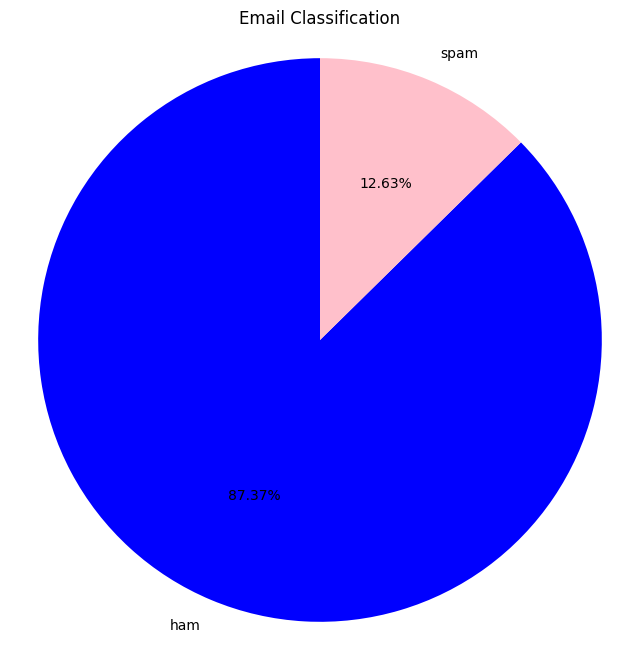

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors= ['blue', 'pink'],
)


ax.set_title('Email Classification')
ax.axis('equal')
plt.show()



The data is imbalanced. The percentage of ham is much higher to spam.

In [63]:
#Analyze the text
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

/var/folders/lr/8c5hs04n5c16pwk_y0fr6fvr0000gn/T/ipykernel_64895/1167159188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)
/var/folders/lr/8c5hs04n5c16pwk_y0fr6fvr0000gn/T/ipykernel_64895/1167159188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
/var/folders/lr/8c5hs04n5c16pwk_y0fr6fvr0000gn/T/ipykernel_64895/1167159188.py:4: SettingWithCopyWarning: 
A value is trying to be set on 

In [64]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [65]:
#Analyze messages which are legit (ham)
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [66]:
#Analyze messages which are legit (ham)
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


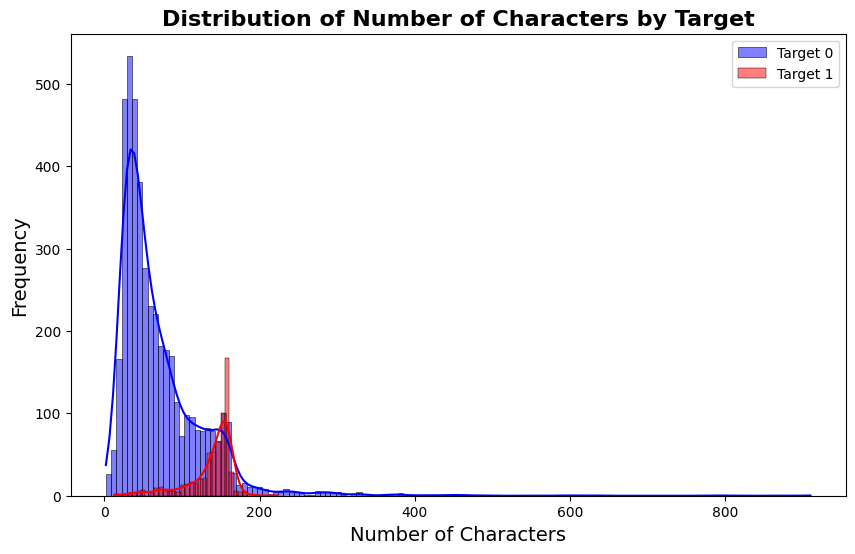

In [67]:
#Distribution of Number of Characters by Target
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

plt.legend()
plt.show()


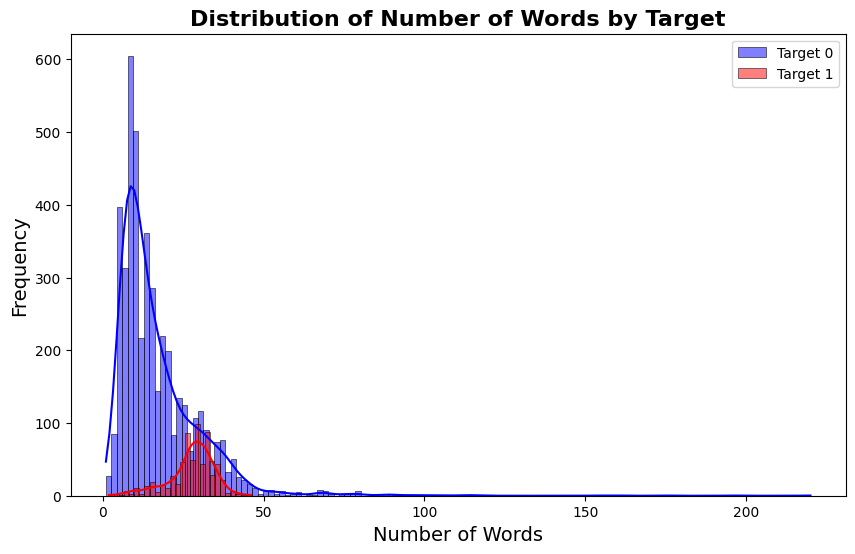

In [68]:
#Distribution of Number of Words by Target
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=True)

plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

plt.legend()
plt.show()


In [69]:
#Correlation
df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


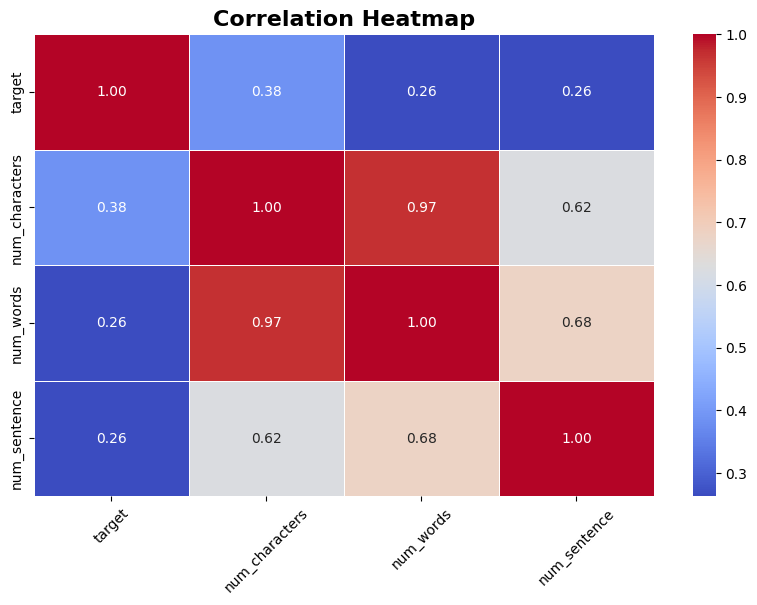

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


In [71]:
#Data Preprocessing

from nltk.stem.porter import PorterStemmer
import string
ps = PorterStemmer()

def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)


In [72]:
#Transformed text
df['transformed_text'] = df['text'].apply(transform_text)

/var/folders/lr/8c5hs04n5c16pwk_y0fr6fvr0000gn/T/ipykernel_64895/4180818520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [73]:
df

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


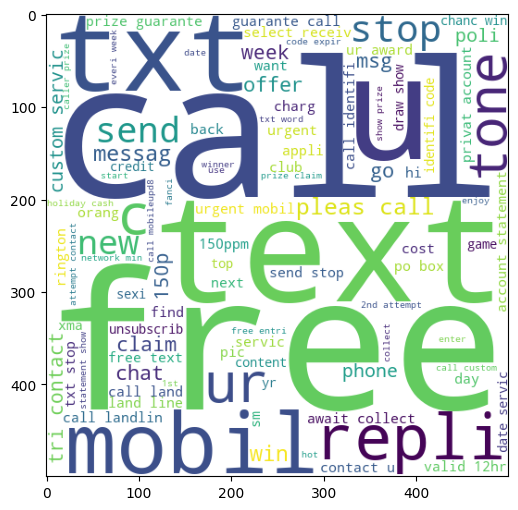

In [74]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

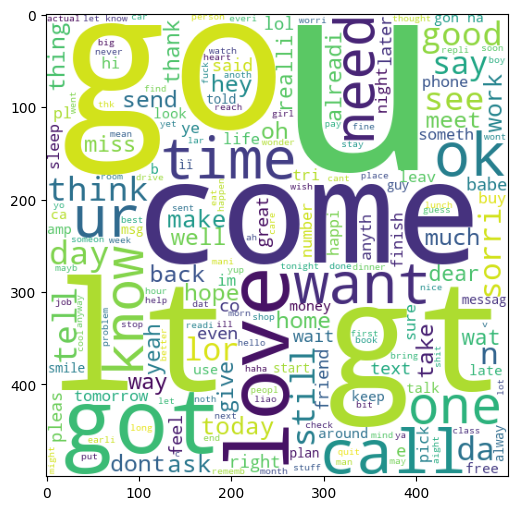

In [75]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

In [76]:
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

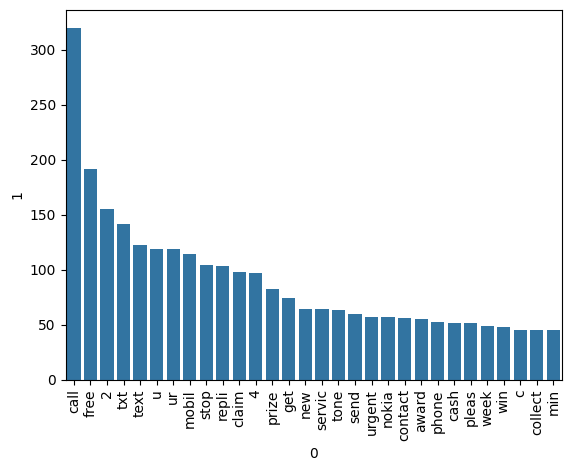

In [77]:
# Top words in Spam messages
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1])
plt.xticks(rotation = 90)
plt.show()

In [78]:
ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

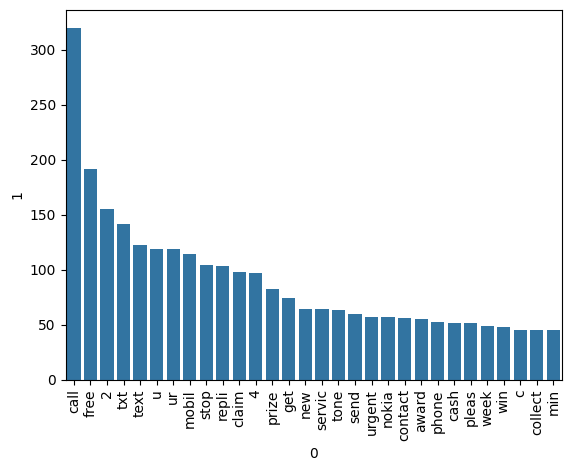

In [79]:
# Top words in ham messages
filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1])
plt.xticks(rotation = 90)
plt.show()

In [80]:
# Model Building 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

In [81]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [84]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)    
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)


    

In [85]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
    
}

In [86]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

In [87]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("Model - ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    


Model -  SVC
Accuracy:  0.9758220502901354
Precision:  0.9747899159663865

Model -  KNN
Accuracy:  0.9052224371373307
Precision:  1.0

Model -  NB
Accuracy:  0.9709864603481625
Precision:  1.0

Model -  DT
Accuracy:  0.9274661508704062
Precision:  0.8118811881188119

Model -  LR
Accuracy:  0.9584139264990329
Precision:  0.9702970297029703

Model -  RF
Accuracy:  0.9758220502901354
Precision:  0.9829059829059829


/Users/manasibhagwat/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Model -  Adaboost
Accuracy:  0.960348162475822
Precision:  0.9292035398230089

Model -  Bgc
Accuracy:  0.9584139264990329
Precision:  0.8682170542635659

Model -  ETC
Accuracy:  0.9748549323017408
Precision:  0.9745762711864406

Model -  GBDT
Accuracy:  0.9468085106382979
Precision:  0.9191919191919192

Model -  xgb
Accuracy:  0.9671179883945842
Precision:  0.9262295081967213


Conclusion
  - Support Vector Classifier (SVC) and Random Forest (RF) demonstrated the highest accuracy, both achieving approximately 97% accuracy.
  - Naive Bayes (NB) achieved a perfect precision score, indicating zero false positives.
  - Other models, including Gradient Boosting, Adaboost, Logistic Regression, and Bagging Classifier, displayed competitive performance with accuracy scores ranging from 94.68% to 96.03%.


